In [0]:
# dont ask me, and I won't clean it..
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np
from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
! rm -rf railway_captcha3.tar.gz
! wget "https://ndownloader.figshare.com/files/22149861" -O samples.tar.gz


--2020-04-09 00:28:16--  https://ndownloader.figshare.com/files/22149861
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.246.149.129, 34.246.143.19, 34.246.188.184, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.246.149.129|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz [following]
--2020-04-09 00:28:17--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.56.107
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.56.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390645514 (373M) [application/gzip]
Saving to: ‘samples.tar.gz’

samples.tar.gz      100%[===================>] 372.55M  34.3MB/s    in 12s     

2020-04-09 00:28:29 (32.3 MB/s) - ‘samples.tar.gz’ saved [390645514/39064

In [0]:
! tar -xvf samples.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [0]:
png_files = glob.glob('samples/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Total # of files =>  10000


'samples/2634.png'

In [0]:
symbols =  '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_,"number of Symbols = ", num_symbols)

(100, 200, 3) number of Symbols =  10


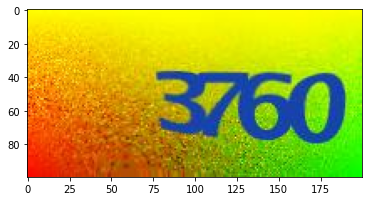

In [0]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img[:,:,::-1])
plt.show()

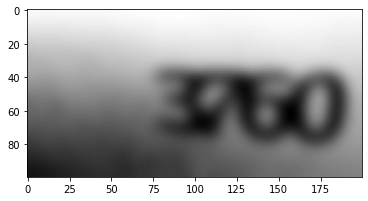

In [0]:
# thresholding binary inverse

img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
blur = img.copy()
blur.astype(dtype=np.uint8)
for item in range(10):
    blur = cv2.blur(blur,(5,5))
    #blur = cv2.GaussianBlur(blur,(5,5),0)
#blur = cv2.blur(img,(5,5))
plt.imshow(blur,cmap='gray')
plt.show()

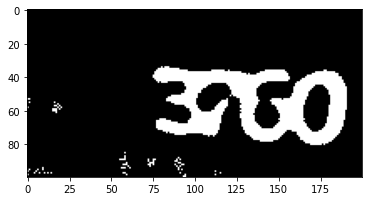

In [0]:
adapt_thres = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,2)
plt.imshow(255-adapt_thres,cmap='gray')
plt.show()

In [0]:
png_files[1]

'samples/3760.png'

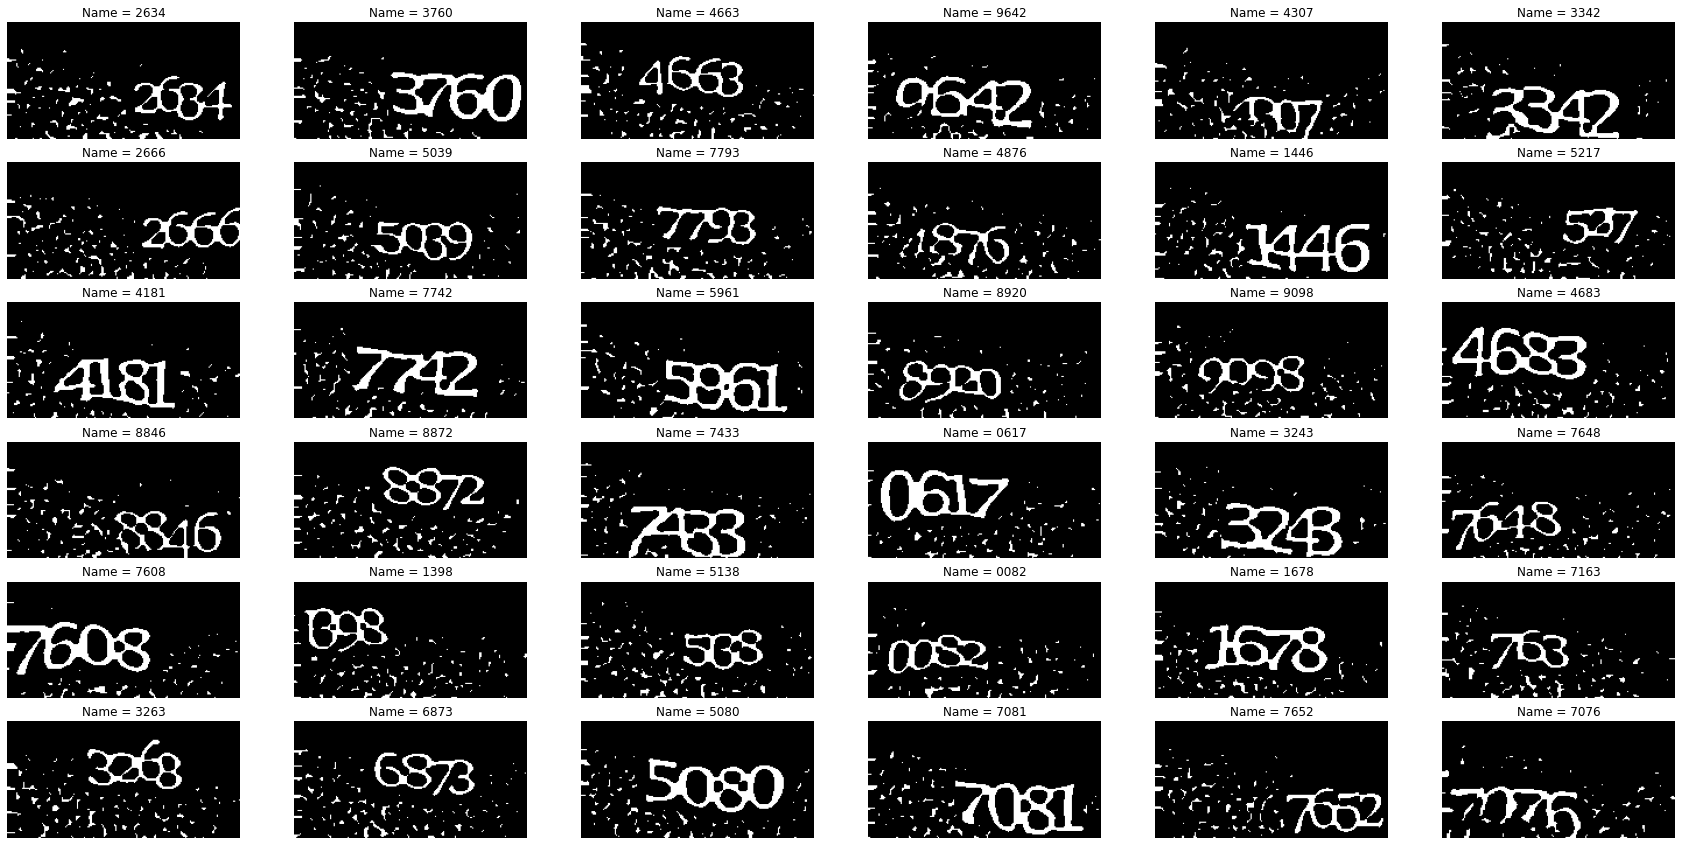

In [0]:
kernel = np.ones((2,2),np.uint8)

total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
  blur = img.copy()
  blur.astype(dtype=np.uint8)
  for k in range(10):
      blur = cv2.blur(blur,(2,2))
  adapt_thres = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,21,2)
  adapt_thres = 255 - adapt_thres
  erosion = cv2.erode(adapt_thres,kernel,iterations = 2)
  image_bckup = erosion.copy()
  plt.subplot(num_pr, num_pr, counter)
  plt.title("Name = {}".format(str(item.split('/')[1]).split('.')[0],fontsize=20)).set_color('black')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()


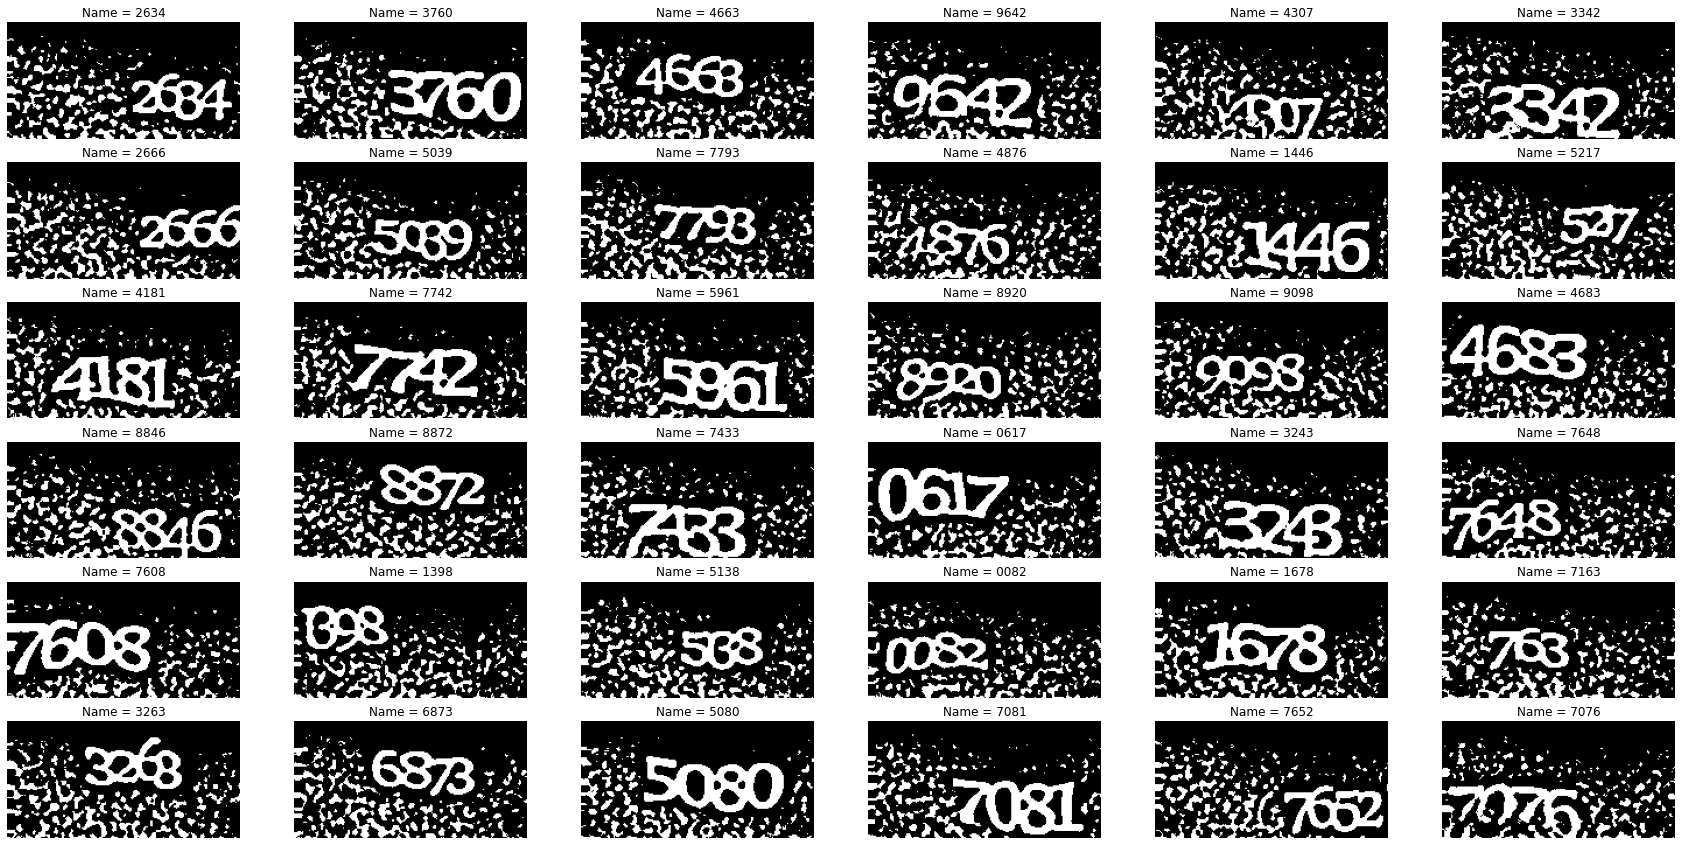

In [0]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
  blur = img.copy()
  blur.astype(dtype=np.uint8)
  for k in range(10):
      blur = cv2.blur(blur,(2,2))
  adapt_thres = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,21,2)
  adapt_thres = 255 - adapt_thres

  # blur = adapt_thres.copy()
  # for k in range(8):
  #     blur = cv2.blur(blur,(2,2))
  # ret,thresh1 = cv2.threshold(blur,240,255,cv2.THRESH_BINARY)
  # image_bckup = thresh1.copy()
  image_bckup = adapt_thres.copy()
  plt.subplot(num_pr, num_pr, counter)
  plt.title("Name = {}".format(str(item.split('/')[1]).split('.')[0],fontsize=20)).set_color('black')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()

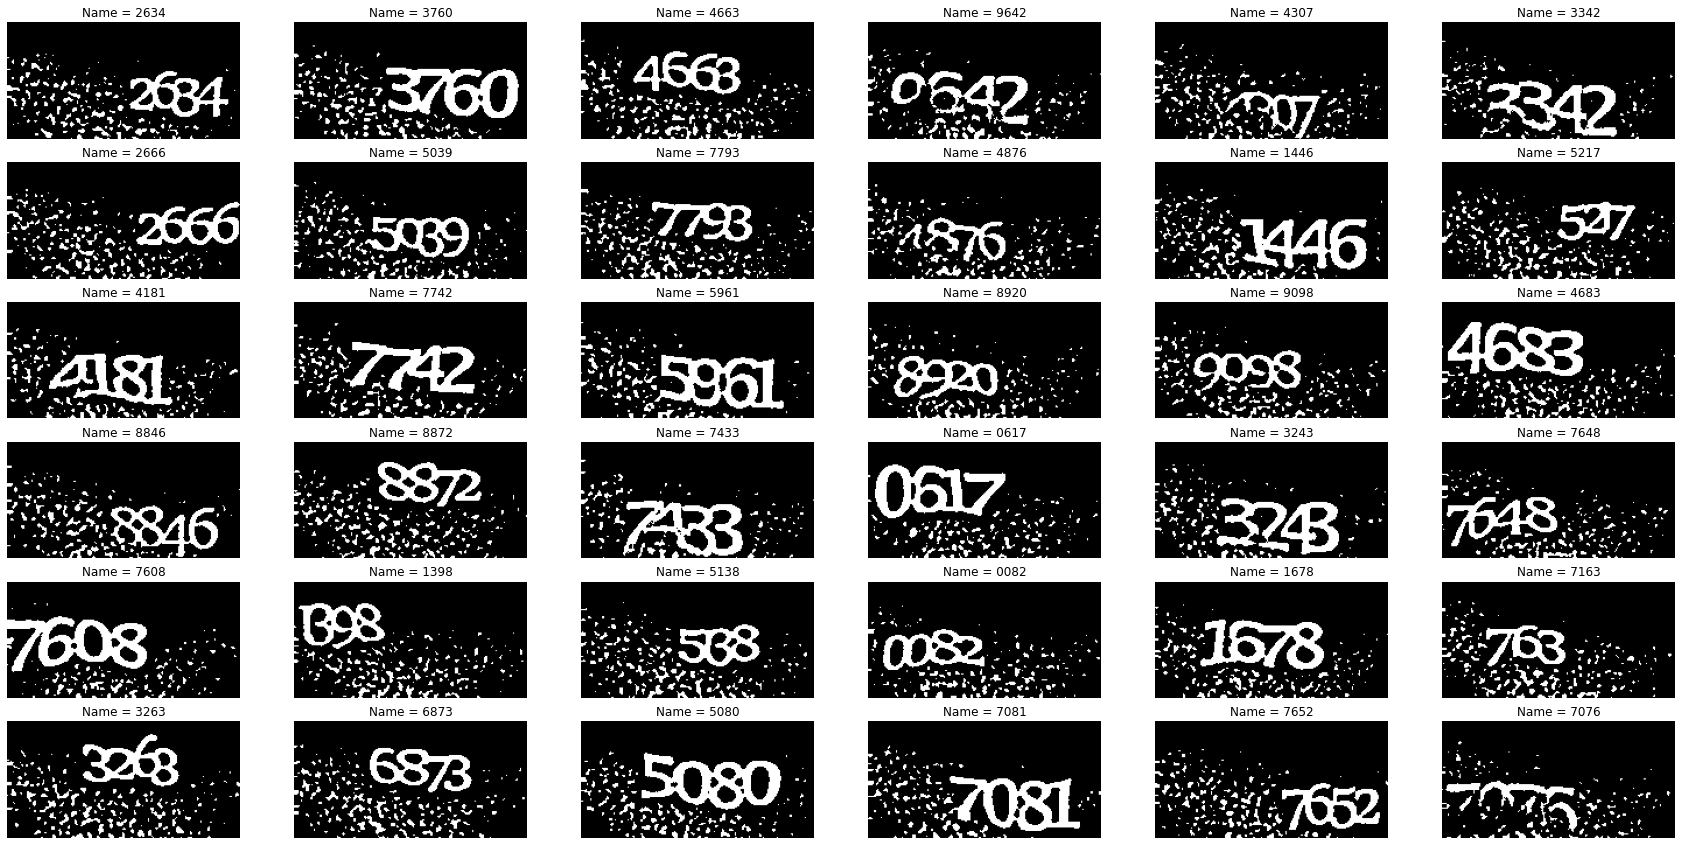

In [0]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  img = cv2.imread(item,cv2.IMREAD_UNCHANGED)
  blur = img.copy()
  blur.astype(dtype=np.uint8)
  for k in range(5):
      blur = cv2.blur(blur,(2,2))
  gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
  adapt_thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,5)
  adapt_thres = 255 - adapt_thres

  # blur = adapt_thres.copy()
  # for k in range(8):
  #     blur = cv2.blur(blur,(2,2))
  # ret,thresh1 = cv2.threshold(blur,240,255,cv2.THRESH_BINARY)
  # image_bckup = thresh1.copy()
  image_bckup = adapt_thres.copy()
  plt.subplot(num_pr, num_pr, counter)
  plt.title("Name = {}".format(str(item.split('/')[1]).split('.')[0],fontsize=20)).set_color('black')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()

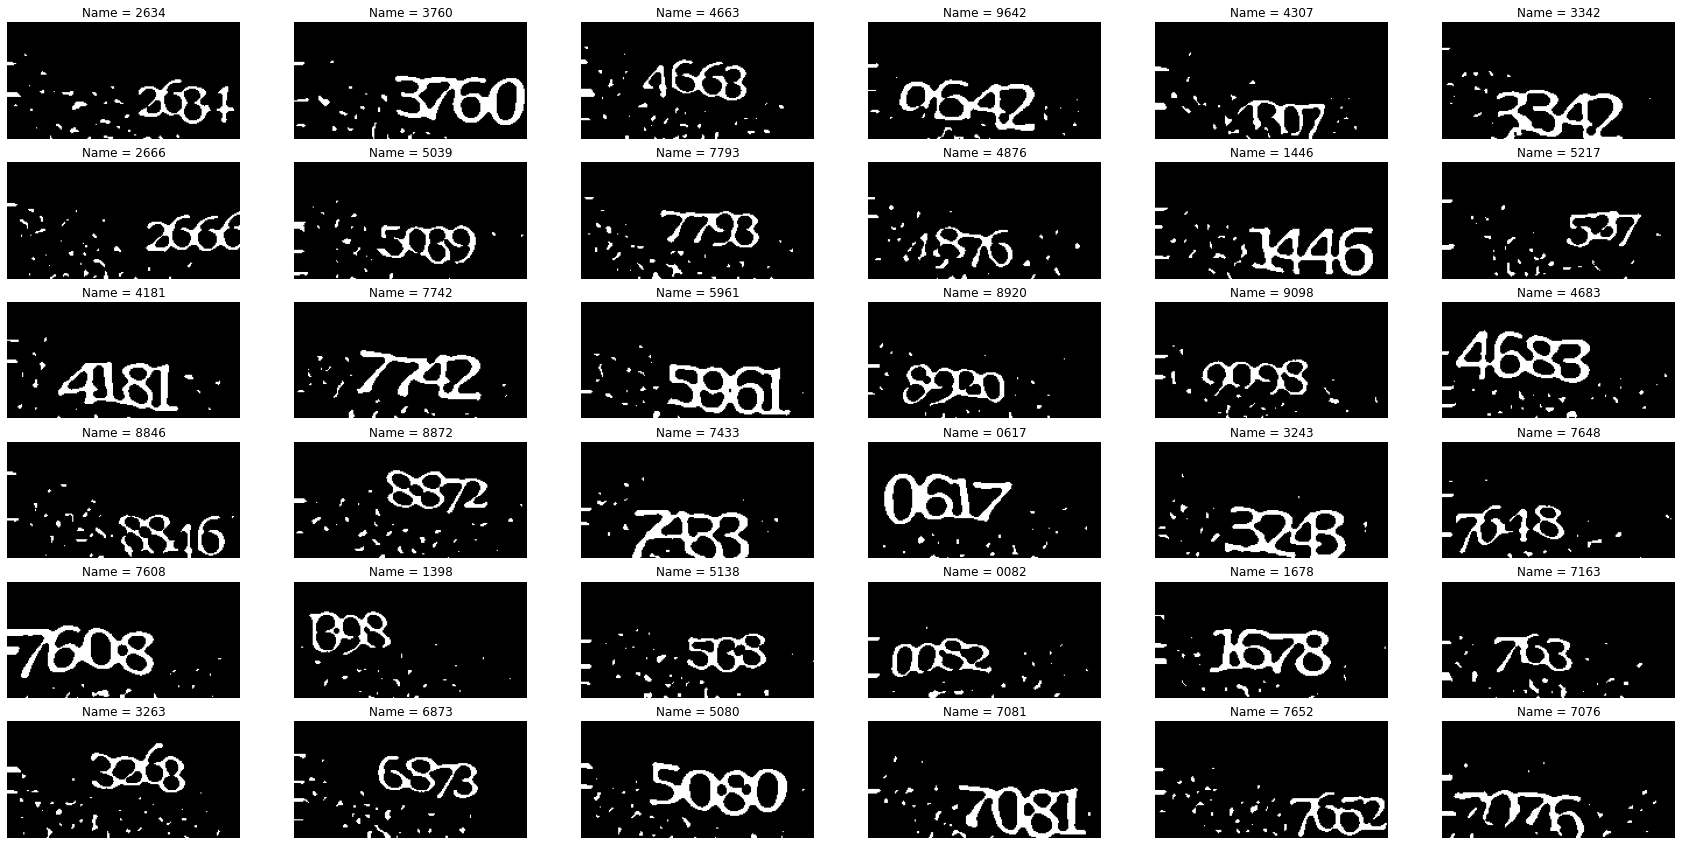

In [0]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
  blur = img.copy()
  blur.astype(dtype=np.uint8)
  for k in range(10):
      blur = cv2.blur(blur,(2,2))
  adapt_thres = cv2.adaptiveThreshold(blur,90,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,21,2)
  adapt_thres = 255 - adapt_thres

  blur = adapt_thres.copy()
  for k in range(8):
      blur = cv2.blur(blur,(2,2))
  ret,thresh1 = cv2.threshold(blur,240,255,cv2.THRESH_BINARY)
  image_bckup = thresh1.copy()
  #image_bckup = adapt_thres.copy()
  plt.subplot(num_pr, num_pr, counter)
  plt.title("Name = {}".format(str(item.split('/')[1]).split('.')[0],fontsize=20)).set_color('black')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()

In [0]:
from tqdm import tqdm
num_symbols = 10
def preprocess_data():
  n_samples = len(os.listdir('samples/'))
  X = np.zeros((n_samples, 200, 100, 1)) #1070*50*200
  print(num_symbols,n_samples)
  y = np.zeros((4, n_samples, num_symbols)) #5*1070*36
  for i, pic in tqdm(enumerate(os.listdir('samples/'))):
    """
    # Read image as grayscale
    img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
    blur = img.copy()
    blur.astype(dtype=np.uint8)
    for k in range(10):
        blur = cv2.blur(blur,(2,2))
    adapt_thres = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,21,2)
    adapt_thres = 255 - adapt_thres
    erosion = cv2.erode(adapt_thres,kernel,iterations = 2)
    img = erosion.copy()
    """
    img = cv2.imread(item,cv2.IMREAD_UNCHANGED)
    blur = img.copy()
    blur.astype(dtype=np.uint8)
    for k in range(5):
        blur = cv2.blur(blur,(2,2))
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    adapt_thres = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,21,2)
    adapt_thres = 255 - adapt_thres
    img = adapt_thres.copy()
    pic_target = pic.split('.')[0]
    img = img / 255.0
    #plt.imshow(img,cmap='gray')
    img = np.reshape(img, (200, 100, 1))
    # Define targets and code them using OneHotEncoding
    targs = np.zeros((4, num_symbols))
    #print("num symbols = ",num_symbols)
    for j, l in enumerate(pic_target):
      ind = symbols.find(l)
      targs[j, ind] = 1
    X[i] = img
    y[:, i] = targs
    
  # Return final data
  return X, y

X, y = preprocess_data()

89it [00:00, 888.64it/s]

10 10000


10000it [00:11, 883.84it/s]


In [0]:
X_train, y_train = X[:9000], y[:, :9000]
X_test, y_test = X[9000:], y[:, 9000:]

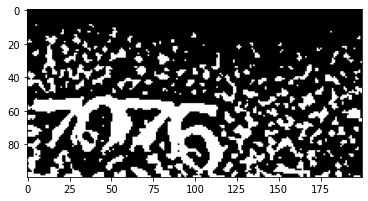

(200, 100, 1)


In [0]:
plt.imshow(X_train[0].reshape((100,200)),cmap='gray')
plt.show()
print(X_train[0].shape)

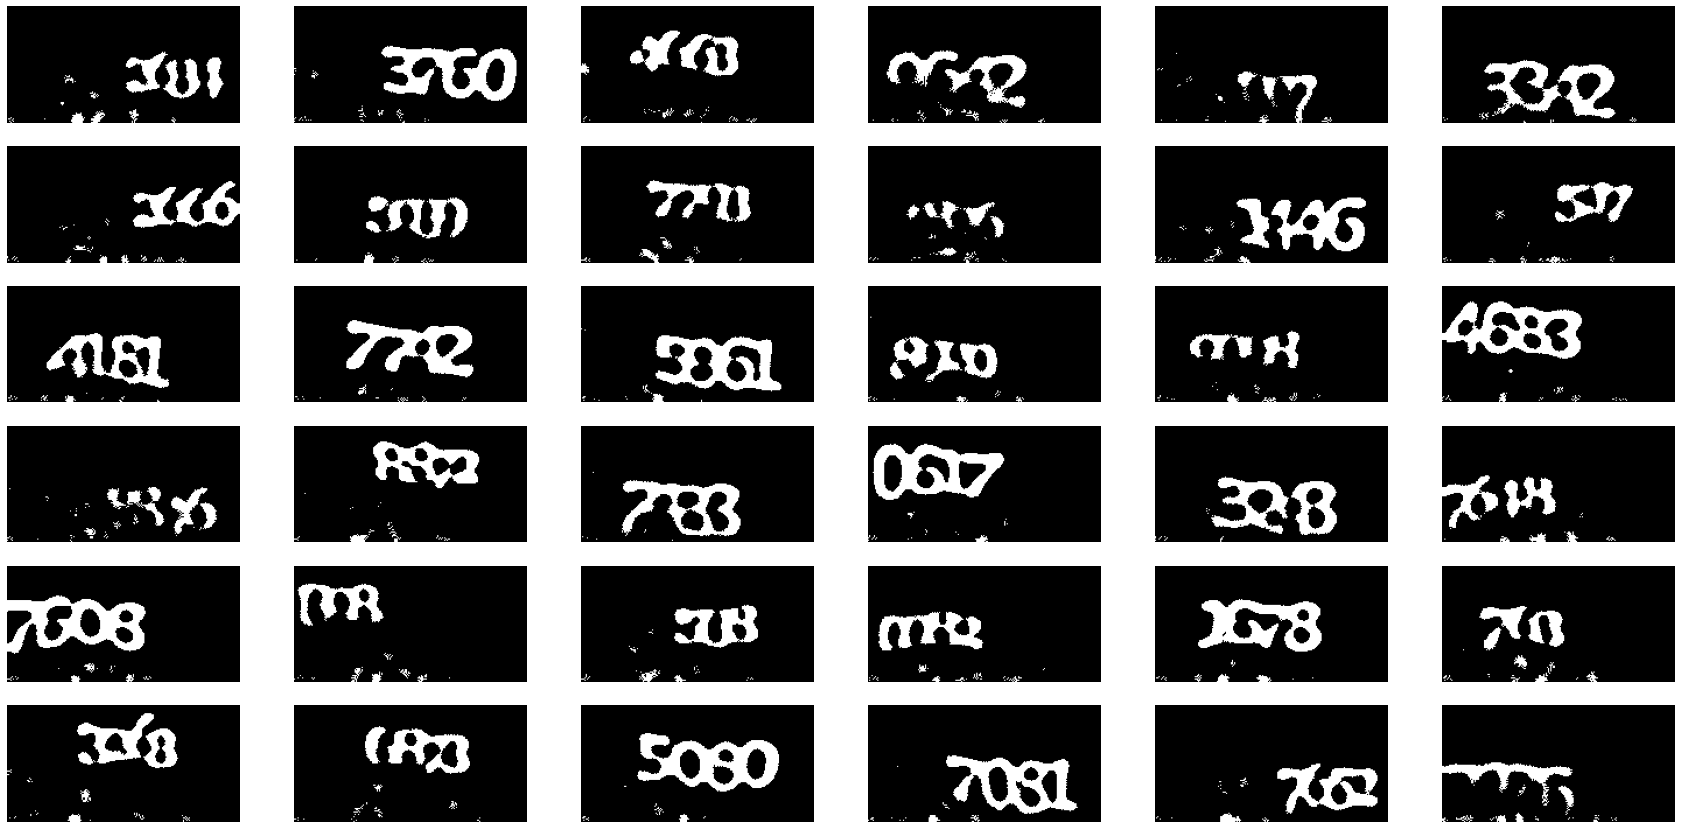

In [0]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in X_train[:36]:
  plt.subplot(num_pr, num_pr, counter)
  #print("item => ",item)
  #print("item => ",str(item.split('_')[1]).split('/')[1])
  #plt.title("Name = {}".format(str(item.split('_')[1]).split('/')[1]),fontsize=20).set_color('black')
  plt.axis('off')
  plt.imshow(item.reshape((100,200)),cmap=plt.get_cmap('gray'))
  counter += 1
  #break
plt.show()

In [0]:
def create_model():
  in_ = Input(shape=img_shape)
  out = in_
  out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Flatten()(out)
  out = Dropout(0.3)(out)
  out = [Dense(10, name='digit1', activation='softmax')(out),\
      Dense(10, name='digit2', activation='softmax')(out),\
      Dense(10, name='digit3', activation='softmax')(out),\
      Dense(10, name='digit4', activation='softmax')(out)]
      #Dense(34, name='digit5', activation='softmax')(out)]
  model = Model(inputs=in_, outputs=out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
img_shape = (200, 100, 1)
model=create_model();
model.summary();

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200, 100, 1)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 200, 100, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 198, 98, 32)  9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 198, 98, 32)  128         conv2d_9[0][0]                   
____________________________________________________________________________________________

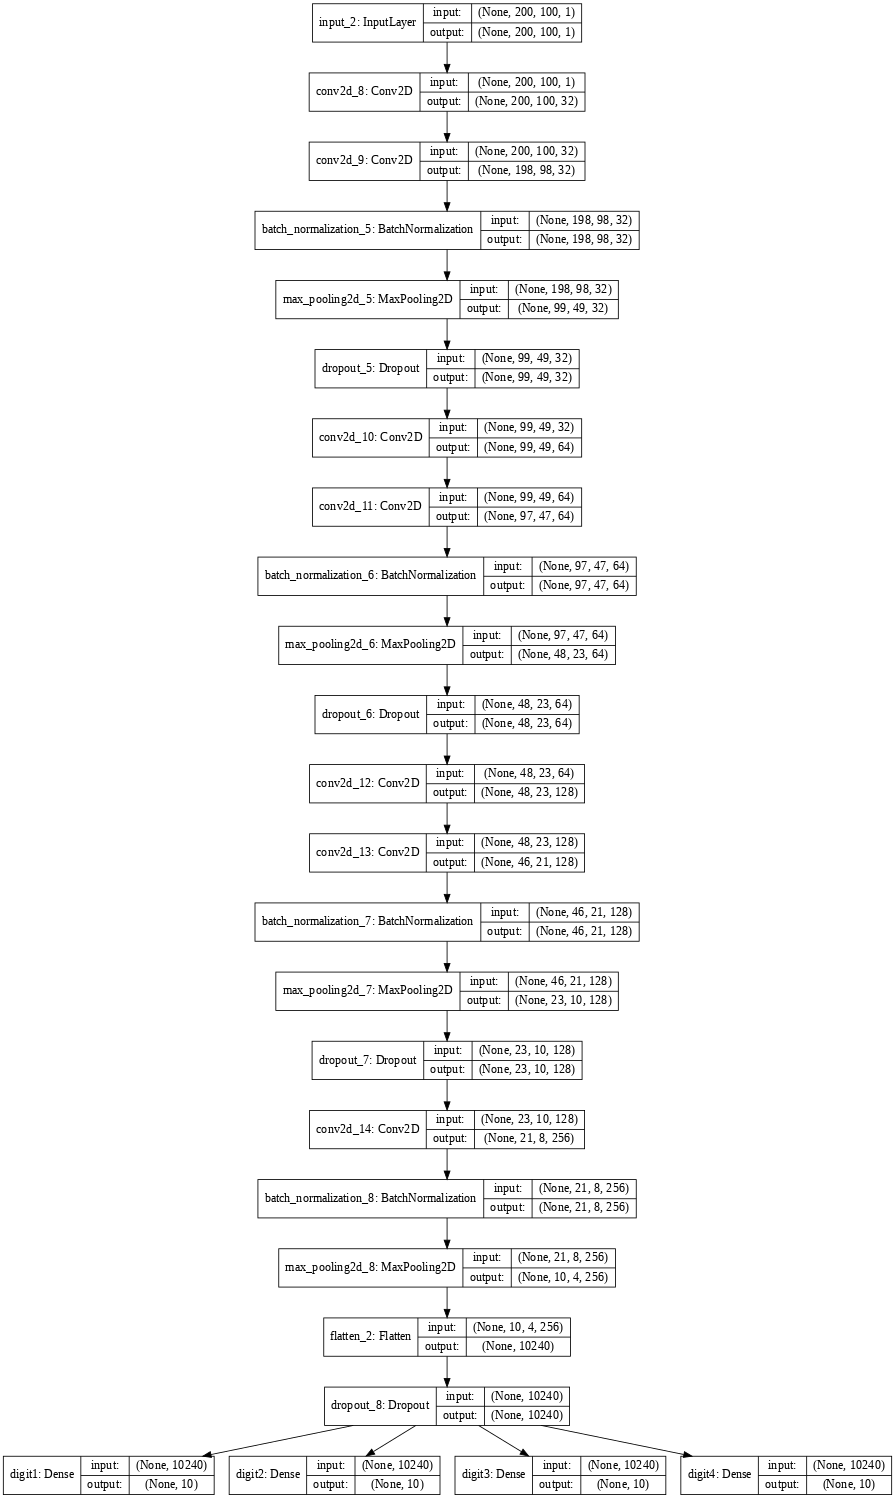

In [0]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [0]:
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2],y_train[3]], batch_size=32, epochs=30,verbose=1, validation_split=0.2,callbacks=[tensorboard_callback])

Train on 7200 samples, validate on 1800 samples
Epoch 1/30
7200/7200 [==============================] - 25s 4ms/step - loss: 13.1907 - digit1_loss: 3.2588 - digit2_loss: 3.2059 - digit3_loss: 3.4603 - digit4_loss: 3.2656 - digit1_acc: 0.0985 - digit2_acc: 0.0997 - digit3_acc: 0.0982 - digit4_acc: 0.0985 - val_loss: 9.2970 - val_digit1_loss: 2.3099 - val_digit2_loss: 2.3280 - val_digit3_loss: 2.3385 - val_digit4_loss: 2.3206 - val_digit1_acc: 0.1017 - val_digit2_acc: 0.1011 - val_digit3_acc: 0.1006 - val_digit4_acc: 0.1061
Epoch 2/30
7200/7200 [==============================] - 25s 3ms/step - loss: 9.2558 - digit1_loss: 2.3102 - digit2_loss: 2.3127 - digit3_loss: 2.3182 - digit4_loss: 2.3147 - digit1_acc: 0.1003 - digit2_acc: 0.1014 - digit3_acc: 0.0989 - digit4_acc: 0.0918 - val_loss: 9.2249 - val_digit1_loss: 2.3048 - val_digit2_loss: 2.3076 - val_digit3_loss: 2.3063 - val_digit4_loss: 2.3062 - val_digit1_acc: 0.1000 - val_digit2_acc: 0.0861 - val_digit3_acc: 0.1006 - val_digit4_acc: 

KeyboardInterrupt: ignored